In [8]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
import pylab as pl
from IPython.display import clear_output

In [101]:
class MLP(nn.Module):
    """
    Implements the neural network of example 1 of the paper 
    "Learning representations by back-propagating errors"
    """
    def __init__(self):
        super().__init__()
        k = 5
        self.hidden = nn.Linear(1, k)
        self.hidden2 = nn.Linear(k, k)
        self.output = nn.Linear(k, 1)
        
    def forward(self, X):
        relu = torch.tanh
        out = relu(self.hidden(X))
        out = relu(self.hidden2(out))
        
        return self.output(out)
    

class Load_matrix(DataLoader):
    """
    Simple dataloader given the data matrix X and response y
    
    Parameters
    ----------
    X: 2d torch.Tensor or 2d numpy.ndarray
        The training input samples
    y: 1d torch.Tensor or 1d numpy.ndarray
        The response variable
    """
    def __init__(self, X, y):
        self.X = torch.Tensor(X)
        self.y = torch.Tensor(y)
            
    def __len__(self):
        return self.X.size()[0]
    
    def __getitem__(self, index):
        return self.X[index, :], self.y[index]
    

def create_data(n=128):
    x = torch.linspace(-1, 1, n)
    eps = torch.randn(n)/3
    return x.view(-1, 1), torch.sin(7*x) + eps


After 1 models we converged to 0.10148286819458008


Text(0.5, 1.0, 'Learning curve')

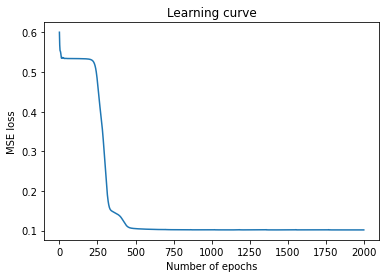

In [108]:
def train_model(model, trainset, n_epochs, criterion, optimizer):
    """
    Trains a model and returns the loss at each epoch
    """
    losses = []
    model.train()
    for epoch in range(n_epochs):
        for data in trainset:
            inputs, labels = data
            optimizer.zero_grad()

            outputs = model(inputs).ravel()
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        losses.append(loss.item())
    
    return losses


# Create the data
X, y = create_data()
dataset = Load_matrix(X, y)

# In the paper they use all the dataset at once, i.e. batch_size=64
trainset = DataLoader(dataset, batch_size=128)
# Loss function used in the paper
criterion = nn.MSELoss(reduction="mean")
# The net discussed in the paper converged in about 1200 iterations
n_epochs=2000

# Here I train models until I get a good one
models_tried = 0
current_loss = 10
while(current_loss > 1):
    # Initialize the net
    net = MLP()
    # Optimizer used in the paper with corresponding learning rate
    optimizer = torch.optim.Adam(net.parameters(), 0.01)
    
    models_tried += 1
    losses = train_model(net, trainset, n_epochs, criterion, optimizer)
    current_loss = losses[-1]
    print("current loss :", current_loss)

clear_output()
print(f"After {models_tried} models we converged to {losses[-1]}")

pl.plot(losses)
pl.xlabel("Number of epochs")
pl.ylabel("MSE loss")
pl.title("Learning curve")

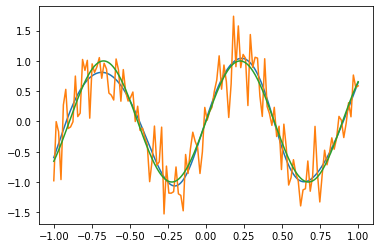

In [109]:
def plot(x=None, y=None):
    if x is None:
        pl.plot(y.ravel().detach().numpy())
    pl.plot(x.ravel().detach().numpy(), y.ravel().detach().numpy())

t = torch.linspace(-1, 1, 1000).view(-1, 1)
plot(t, net(t))
plot(X, y)
plot(t, torch.sin(7*t))